In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
sns.set_style("white")
sns.set_palette(sns.color_palette("Set2"))

In [2]:
def make_dataset(nstorms,mslp,u850,v850,shear,lat,lon):
	"""
	This function creates the training dataset or similar for TC variables
	Variables used are:
			mslp
			u850
			v850
			shear
			lat
			lon
	"""
	
	processed_variables = np.zeros((nstorms,6))
	processed_variables[:,0] = mslp # or p?
	processed_variables[:,1] = u850
	processed_variables[:,2] = v850
	processed_variables[:,3] = shear
	processed_variables[:,4] = lat
	processed_variables[:,5] = lon

	return processed_variables

In [3]:
# filepath = '/user/home/al18709/work/ibtracks/miroc6_hist_tracks.csv'
filepath = '/user/home/al18709/work/ibtracks/miroc6_ssp585_tracks.csv'
tracks = pd.read_csv(filepath)
print(tracks)

                            sid  year  month  day  hour     lat      lon  \
0            miroc6-hist-1-2015  2015      3   28    18  -6.895  353.392   
1            miroc6-hist-1-2015  2015      3   28    20  -6.886  353.225   
2            miroc6-hist-1-2015  2015      3   28    22  -6.878  353.069   
3            miroc6-hist-1-2015  2015      3   29     0  -6.871  352.925   
4            miroc6-hist-1-2015  2015      3   29     2  -6.866  352.794   
...                         ...   ...    ...  ...   ...     ...      ...   
2358907  miroc6-hist-17200-2100  2100      7   10     8  21.301  137.745   
2358908  miroc6-hist-17200-2100  2100      7   10    10  21.242  137.636   
2358909  miroc6-hist-17200-2100  2100      7   10    12  21.204  137.502   
2358910  miroc6-hist-17200-2100  2100      7   10    14  21.185  137.340   
2358911  miroc6-hist-17200-2100  2100      7   10    16  21.187  137.142   

             v  shear     rh  u850  v850        p  
0        10.35   5.95  55.65 -3.81 

In [4]:
# organise Kerry's tracks
print(tracks.shape)
p = tracks.p*100
u850 = tracks.u850
v850 = tracks.v850
shear = tracks.shear
lats = tracks.lat
lons = tracks.lon

# correct longitudes
for i in range(len(lons)):
	if lons[i] > 180:
		lons[i] = lons[i]-360

sids = tracks.sid
sids_unique=sids.drop_duplicates
tracks_grouped = tracks.groupby('sid')
nstorms,_ = tracks.shape
ke_data = make_dataset(nstorms,p,u850,v850,shear,lats,lons)
# np.save('/user/work/al18709/tc_data_flipped/KE_tracks/ke_miroc6-hist.npy',ke_data)
np.save('/user/work/al18709/tc_data_flipped/KE_tracks/ke_miroc6-ssp585.npy',ke_data)

# print(tracks_grouped.get_group('miroc6-hist-19351-1979'))

(2358912, 13)


/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [19]:
y = np.load('/user/work/al18709/tc_data_flipped/extreme_test_combined_y.npy')
X = np.load('/user/work/al18709/tc_data_flipped/extreme_test_combined_X.npy')
meta=pd.read_csv('/user/work/al18709/tc_data_flipped/extreme_test_meta.csv')

In [20]:
# print(meta)
print(X)
print(np.count_nonzero(np.isnan(X)))

[[[[ 5.95108122e-02  1.00592500e+05  9.31230839e-03 ...  5.23924541e+00
    -2.29369736e+00 -2.32292128e+00]
   [ 4.93839197e-02  1.00563930e+05  1.12377601e-02 ...  6.32924271e+00
    -1.57345867e+00 -1.64428854e+00]
   [ 4.75465618e-02  1.00533758e+05  1.58153251e-02 ...  7.20791388e+00
    -1.00811052e+00 -1.27119422e+00]
   ...
   [ 6.50138974e-01  1.00473414e+05  1.61843654e-02 ...  8.37894630e+00
     2.71441102e+00  2.33999062e+00]
   [ 1.05619872e+00  1.00493195e+05  1.68348011e-02 ...  7.84506941e+00
     3.44239378e+00  1.75962162e+00]
   [ 1.01008856e+00  1.00540148e+05  1.71504486e-02 ...  8.82702065e+00
     3.75733662e+00  1.40341628e+00]]

  [[ 1.07444048e-01  1.00598891e+05  1.34368856e-02 ...  4.15878153e+00
    -1.69995213e+00 -3.72624731e+00]
   [ 3.32289487e-02  1.00566922e+05  1.60503834e-02 ...  6.03052616e+00
    -1.87033129e+00 -3.57117510e+00]
   [ 1.99328121e-02  1.00521172e+05  1.64630748e-02 ...  7.63374329e+00
    -1.10362625e+00 -3.15969658e+00]
   ...
   

In [10]:
# create training dataset
variables = ['precip','mslp','q-925','u-200','u-850','v-200','v-850']
nstorms,_,_,_ = X.shape
precip = np.mean(X[:,:,:,0],axis=(1,2))
mslp = np.mean(X[:,:,:,1],axis=(1,2))
q925 = np.mean(X[:,:,:,2],axis=(1,2))
u200 = np.mean(X[:,:,:,3],axis=(1,2))
u850 = np.mean(X[:,:,:,4],axis=(1,2))
v200 = np.mean(X[:,:,:,5],axis=(1,2))
v850 = np.mean(X[:,:,:,6],axis=(1,2))
shear = np.sqrt(np.abs(np.square(u850-u200) - np.square(v850-v200)))
lat = meta.centre_lat
lon = meta.centre_lon



processed_variables = np.zeros((nstorms,6))
processed_variables[:,0] = mslp # or p?
# processed_variables[:,1] = q925 # or rh
processed_variables[:,1] = u850
processed_variables[:,2] = v850
processed_variables[:,3] = shear
processed_variables[:,4] = lat
processed_variables[:,5] = lon

In [11]:
print(np.count_nonzero(np.isnan(processed_variables[:,0])))
print(np.count_nonzero(np.isnan(processed_variables[:,1])))
print(np.count_nonzero(np.isnan(processed_variables[:,2])))
print(np.count_nonzero(np.isnan(processed_variables[:,3])))
print(np.count_nonzero(np.isnan(processed_variables[:,4])))
print(np.count_nonzero(np.isnan(processed_variables[:,5])))
print(processed_variables)

0
0
0
0
0
0
[[  0.       0.       0.       0.       6.45   151.85  ]
 [  0.       0.       0.       0.       6.5137 151.962 ]
 [  0.       0.       0.       0.       6.6429 152.02  ]
 ...
 [  0.       0.       0.       0.      39.2664 125.67  ]
 [  0.       0.       0.       0.      40.8333 126.34  ]
 [  0.       0.       0.       0.      42.5999 127.219 ]]


In [12]:
# save training dataset
np.save('/user/work/al18709/tc_data_flipped/KE_tracks/extreme_valid_X.npy',processed_variables)
np.save('/user/work/al18709/tc_data_flipped/KE_tracks/extreme_valid_y.npy',y)
meta.to_csv('/user/work/al18709/tc_data_flipped/KE_tracks/extreme_valid_meta.csv')

print(processed_variables.shape)
print(mslp)

# for sid in sids_unique:
# 	storm = tracks_grouped.get_group(sid)
# 	storm_lats = storm.lat
# 	storm_lons = storm.lon
# 	storm_month = storm.month
# 	storm_year = storm.year
# 	storm_v = storm.v

	

(5343, 6)
[0. 0. 0. ... 0. 0. 0.]


In [17]:
print(X)
# print(meta)

[[[[ 0.375   0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   ...
   [ 2.      0.      0.     ...  0.      0.      0.    ]
   [ 1.6875  0.      0.     ...  0.      0.      0.    ]
   [ 1.6875  0.      0.     ...  0.      0.      0.    ]]

  [[ 0.375   0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   ...
   [ 2.0625  0.      0.     ...  0.      0.      0.    ]
   [ 1.6875  0.      0.     ...  0.      0.      0.    ]
   [ 1.6875  0.      0.     ...  0.      0.      0.    ]]

  [[ 0.375   0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   ...
   [ 2.0625  0.      0.     ...  0.      0.      0.    ]
   [ 1.6875  0.      0.     ...  0.      0.      0.    ]
   [ 1

In [23]:

# fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
# c = ax.contourf(lons,lats, transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.COASTLINE,linewidth=0.5)
# ax.add_feature(cfeature.LAND, zorder=100,color='black',alpha=0.1)
# import plotly.express as px

# fig = px.density_contour(tracks, x="lon", y="lat")
# fig.update_traces(contours_coloring="fill", contours_showlabels = True)
# fig.show()

In [4]:
top = np.load('/user/home/al18709/work/tc_data_flipped/extreme_valid_y.npy')
what = np.load('/user/home/al18709/work/tc_data_flipped/extreme_valid_X.npy')

In [7]:
print(what.shape)

(5425, 10, 10)


In [41]:
a = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/extreme_test_X.npy')
b = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/extreme_test_y.npy')

In [42]:
print(a.shape)
print(b.shape)

(5217, 6)
(5217, 100, 100)


In [39]:
# top = np.load('/user/home/al18709/work/tc_data_flipped_t/valid_y.npy')
# what = np.load('/user/home/al18709/work/tc_data_flipped_t/valid_X.npy')

In [44]:
print(top.shape)
print(what.shape)

(5217, 100, 100)
(5217, 10, 10)


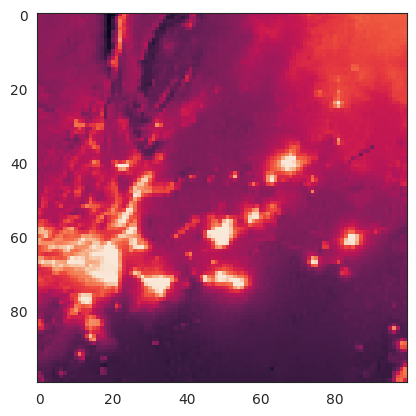

In [37]:
plt.imshow(what[0,:,:])

In [7]:
# accumulated cyclone energy

In [ ]:
# Seasonal frequency by basin